In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    print('Arquivo carregado:', fn)
    df = pd.read_csv(fn)

df.head()


Saving netflix_titles.csv to netflix_titles.csv
Arquivo carregado: netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

df.drop_duplicates(inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['release_year'] = df['release_year'].astype(int)

df['rating'] = df['rating'].replace('Not Rated', np.nan)

df['duration'] = df['duration'].fillna('0 min')


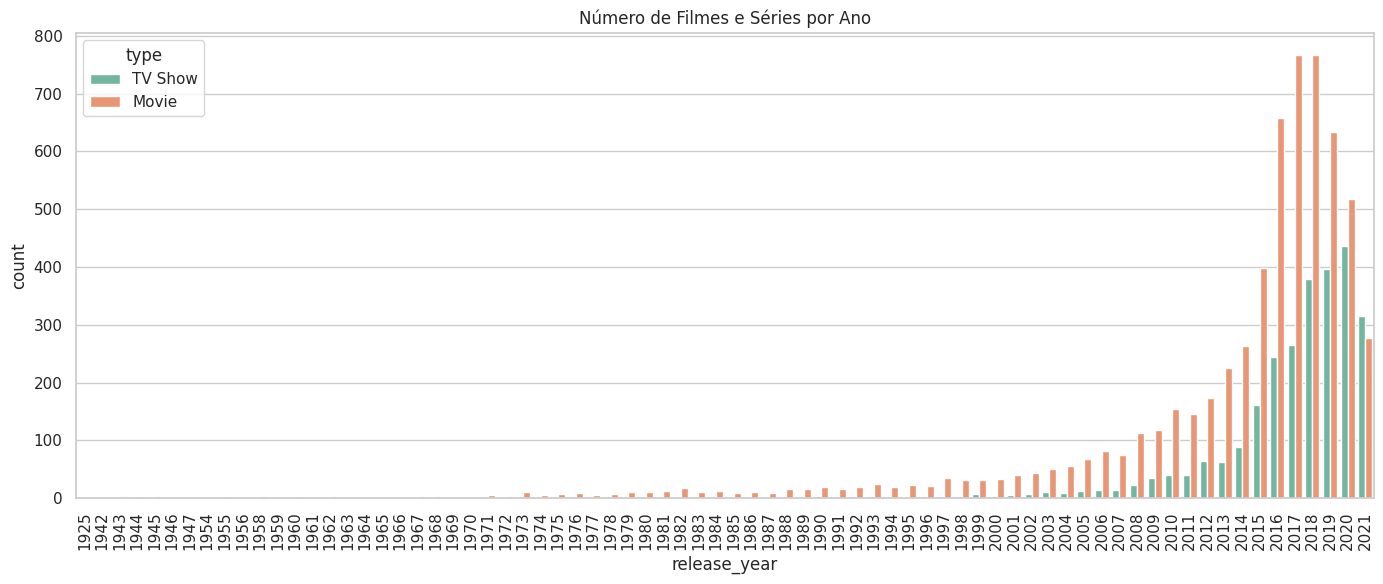

In [5]:
plt.figure(figsize=(14,6))
sns.countplot(x='release_year', hue='type', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Número de Filmes e Séries por Ano')
plt.tight_layout()
plt.savefig('filmes_vs_series_ano.png')
plt.show()


/tmp/ipython-input-2015773996.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


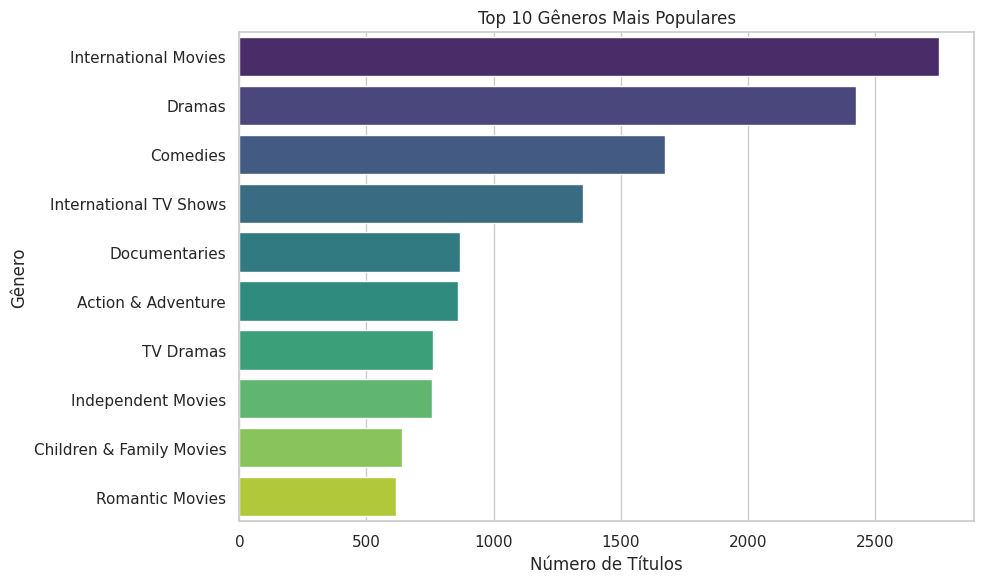

In [6]:
df['listed_in'] = df['listed_in'].str.split(', ')
all_genres = df.explode('listed_in')

top_genres = all_genres['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Gêneros Mais Populares')
plt.xlabel('Número de Títulos')
plt.ylabel('Gênero')
plt.tight_layout()
plt.savefig('generos.png')
plt.show()


/tmp/ipython-input-838027489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='release_year', data=df, palette='pastel')


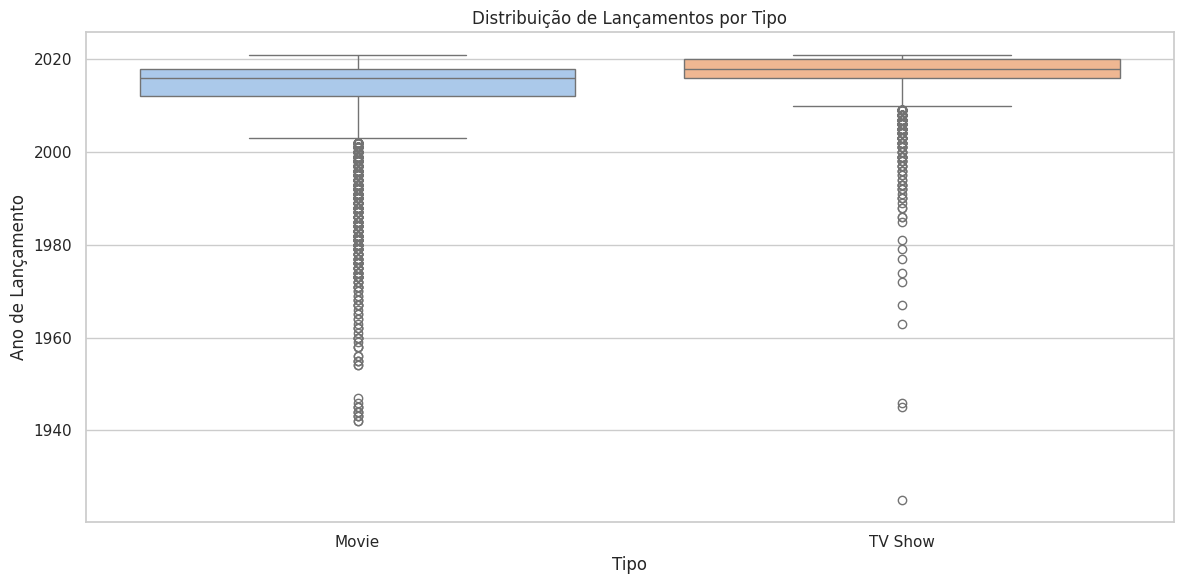

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='release_year', data=df, palette='pastel')
plt.title('Distribuição de Lançamentos por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Ano de Lançamento')
plt.tight_layout()
plt.savefig('distribuicao_tipo.png')
plt.show()


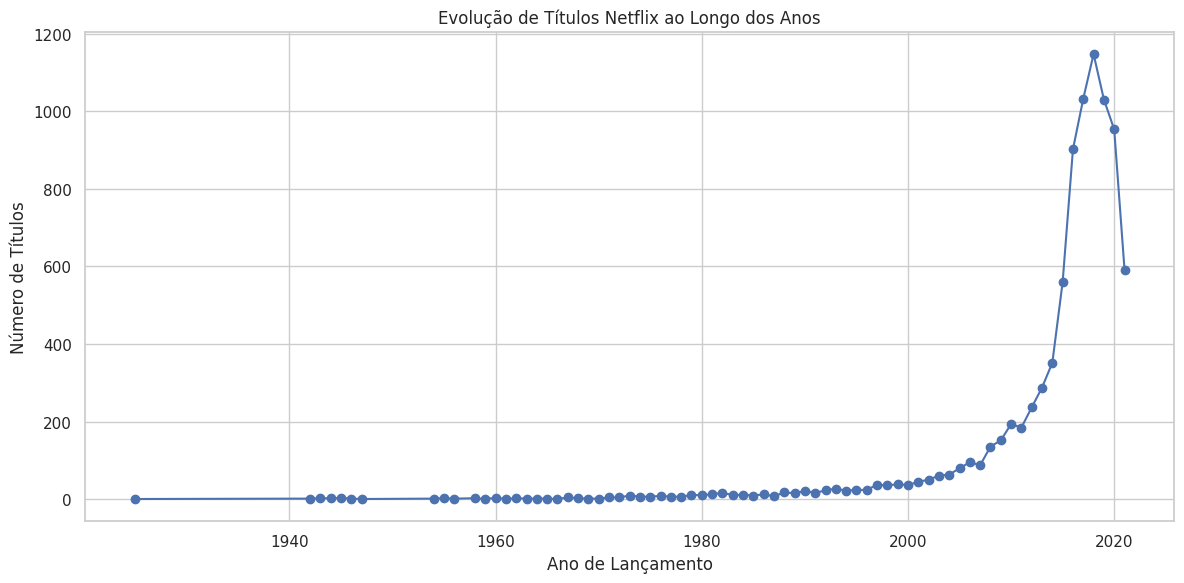

In [8]:
df.groupby('release_year').size().plot(kind='line', marker='o')
plt.title('Evolução de Títulos Netflix ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.tight_layout()
plt.savefig('evolucao_lancamentos.png')
plt.show()
# Converter duração para minutos
df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='duration_min', data=df, palette='cool')
plt.title('Distribuição de Duração por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Duração (minutos)')
plt.tight_layout()
plt.savefig('duracao.png')
plt.show()

/tmp/ipython-input-3238528504.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration_min', data=df, palette='cool')


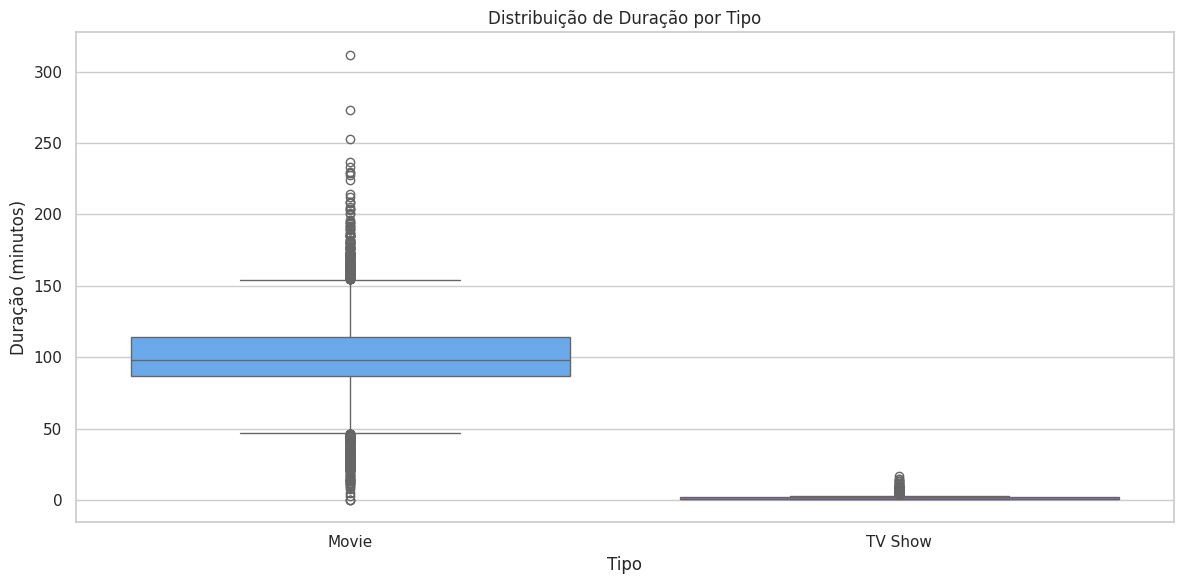

In [9]:
df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='duration_min', data=df, palette='cool')
plt.title('Distribuição de Duração por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Duração (minutos)')
plt.tight_layout()
plt.savefig('duracao.png')
plt.show()
